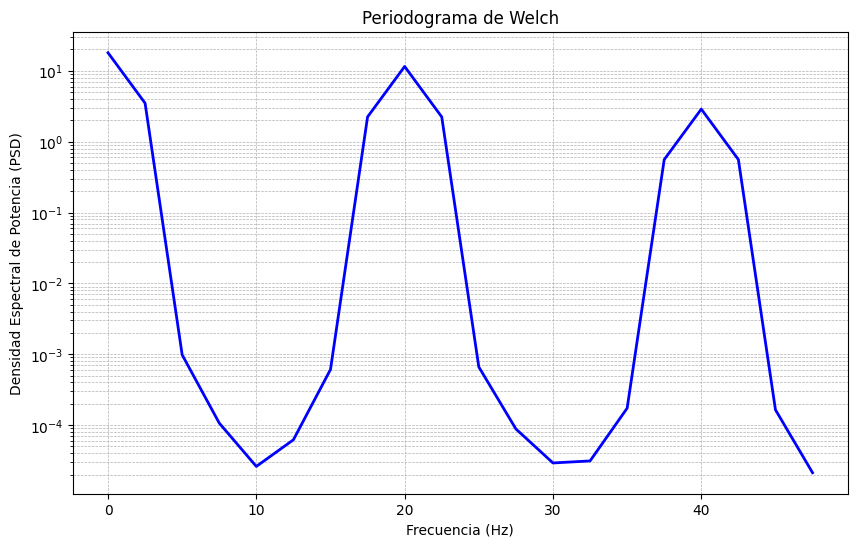

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def welch_periodogram(x, M, S, fs):
    # Crear una ventana Hamming
    window = np.hamming(M)
    # Número de segmentos
    num_segments = int(np.ceil((len(x) - S) / (M - S)))
    # Inicializar la densidad espectral de potencia (PSD)
    psd = np.zeros(M)

    for i in range(num_segments):
        # Definir los índices del segmento
        start = i * (M - S)
        end = start + M

        # Asegurar que el segmento esté completo
        if end > len(x):
            break

        # Extraer el segmento
        segment = x[start:end]

        # Aplicar la ventana
        windowed_segment = segment * window

        # Calcular la FFT del segmento
        fft_segment = np.fft.fft(windowed_segment, n=M)

        # Calcular el periodograma modificado del segmento
        periodogram = (np.abs(fft_segment) ** 2) / (M * np.sum(window ** 2))

        # Acumular el periodograma
        psd += periodogram

    # Promediar el periodograma
    psd /= num_segments

    # Frecuencias correspondientes
    freqs = np.fft.fftfreq(M, d=1/fs)

    # Tomar solo la mitad positiva del espectro
    half_range = M // 2
    return freqs[:half_range], psd[:half_range]

# Prueba con una señal
T = 1 / 100  # Periodo de muestreo
t_max = 10  # Duración total (s)
t = np.arange(0, t_max, T)
x = 4 * np.cos(80 * np.pi * t + np.pi / 4) + 8 * np.sin(40 * np.pi * t) + 5
fs = 100  # Frecuencia de muestreo
M = 40  # Tamaño de la ventana
S = 30  # Superposición

# Calcular y graficar el periodograma
freqs, psd = welch_periodogram(x, M, S, fs)
plt.figure(figsize=(10, 6))
plt.semilogy(freqs, psd, lw=2, color='blue')
plt.title('Periodograma de Welch')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (PSD)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
